Processing gaze data...
Processing directory: ./data/eloise
Processing directory: ./data/Hossein
Processing directory: ./data/koala
Processing directory: ./data/melissa
Processing directory: ./data/muzzy
Processing directory: ./data/Naia
Processing directory: ./data/PerfectUser
Processing directory: ./data/Shaq
Processing directory: ./data/Will
Processing directory: ./data/William
Processing directory: ./data/WilliamOld
Processed 3801 gaze points.


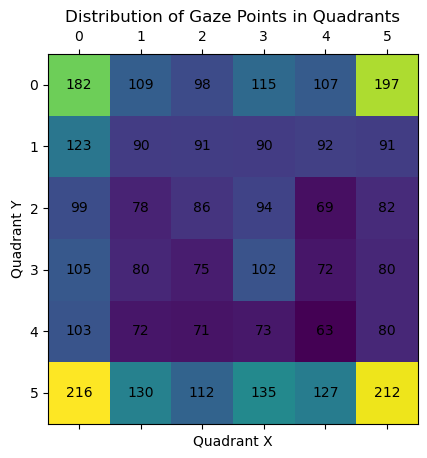

In [7]:
import os
import pandas as pd
import json
from matplotlib import pyplot as plt

def get_screen_size(metadata_file_path):
    with open(metadata_file_path, 'r') as f:
        metadata = json.load(f)

        # Check if 'screenData' is a key in the metadata
        if 'screenData' in metadata:
            metadata = metadata['screenData']
        # Otherwise, assume the metadata is already at the top level

        screen_width = metadata.get('screenWidth')
        screen_height = metadata.get('screenHeight')

        if screen_width is None or screen_height is None:
            raise ValueError("Screen size not found in metadata")

        return screen_width, screen_height

# Define quadrant grid size
grid_size = 6

# Function to calculate the quadrant for a given point
def calculate_quadrant(x, y, width, height, grid_size):
    quadrant_x = int((x / width) * grid_size)
    quadrant_y = int((y / height) * grid_size)
    # Adjust for edge cases where the gaze point is at the exact maximum of the screen's width/height
    quadrant_x = min(quadrant_x, grid_size - 1)
    quadrant_y = min(quadrant_y, grid_size - 1)
    return quadrant_x, quadrant_y

# Function to process the CSV files and count gaze points per quadrant
def process_gaze_data(base_dir, grid_size):
    quadrant_counts = [[0] * grid_size for _ in range(grid_size)]
    count = 0
    print('Processing gaze data...')

    # Only look at immediate subdirectories of the base_dir
    for user_dir in next(os.walk(base_dir))[1]:
        full_user_dir = os.path.join(base_dir, user_dir)
        print('Processing directory:', full_user_dir)
        
        metadata_file_path = os.path.join(full_user_dir, 'metadata.json')
        if os.path.exists(metadata_file_path):
            screen_width, screen_height = get_screen_size(metadata_file_path)

            # Process each CSV file in the user directory
            for file in os.listdir(full_user_dir):
                if file.endswith('.csv'):
                    data_file_path = os.path.join(full_user_dir, file)
                    data = pd.read_csv(data_file_path, header=None, skiprows=1)
                    for index, row in data.iterrows():
                        gaze_x = float(row[1])
                        gaze_y = float(row[2])
                        qx, qy = calculate_quadrant(gaze_x, gaze_y, screen_width, screen_height, grid_size)
                        quadrant_counts[qy][qx] += 1
                        count += 1
        else:
            print(f"Metadata file not found in {full_user_dir}")
    
    print('Processed', count, 'gaze points.')
    return quadrant_counts

# Base directory where the CSV files are located
base_dir = './data/'

# Process the data and get the quadrant counts
quadrant_counts = process_gaze_data(base_dir, grid_size)

# Visualize the quadrant counts
def plot_quadrant_distribution(quadrant_counts, grid_size):
    fig, ax = plt.subplots()
    ax.matshow(quadrant_counts, cmap='viridis')

    for i in range(grid_size):
        for j in range(grid_size):
            c = quadrant_counts[j][i]
            ax.text(i, j, str(c), va='center', ha='center')

    plt.xlabel('Quadrant X')
    plt.ylabel('Quadrant Y')
    plt.title('Distribution of Gaze Points in Quadrants')
    plt.show()

# Plot the distribution
plot_quadrant_distribution(quadrant_counts, grid_size)
